<a href="https://colab.research.google.com/github/cel34/Inferencia-Estad-stica-2022/blob/main/Simulations_with_Objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
inputs = {
    'state': ['Sano','Infectado','Recuperado'],
    'prob_infect': 0.45,
    'population': 100000,
    'density': 0.6,
    'initial_infected': 1,
    'simulation_time': 125,
    'recovery_time': 15
}

In [ ]:
def infect(prob):
    return np.random.choice([0,1], p=[1-prob, prob]) #bernoulli

In [ ]:
def start_infection(num_infected, humans):
  #generar #num_infected aleatorios y cambiar su valor a infectados
  for i in range(num_infected):
    idx = np.random.randint(0, len(humans))
    humans[idx].get_infected()

In [ ]:
class Human:
  def __init__(self, inputs):
    self.state = 'Sano'
    self.time_infected = 0
    self.prob_infect = inputs['prob_infect']

  def infect(self):
    return infect(self.prob_infect)

  def get_infected(self):
    self.state = 'Infectado'

  def recover(self):
    if self.time_infected >= inputs['recovery_time']:
      self.state = 'Recuperado'

  def update(self):
    self.time_infected += 1
    self.recover()

  def is_infected(self):
    if self.state == 'Infectado':
      return True
    else:
      return False

In [ ]:
class World:
  def __init__(self, inputs):
    self.population = inputs['population']
    self.initial_infected = inputs['initial_infected']
    self.humans = [Human(inputs) for i in range(self.population)]

  def get_infected_population(self):
    infected_population = 0
    for human in self.humans:
      if human.is_infected():
        infected_population += 1
    return infected_population

  def start_simulation(self):
    start_infection(self.initial_infected, self.humans)

    time = [0]
    num_infected_at_time_t = [self.initial_infected]
    for t in range(inputs['simulation_time']):
      #para cada humano, se selecciona una interaccion aleatoria, y probamos si se enfacta o no
      for human in self.humans:
        interact = np.random.random()
        if interact < inputs['density']:
          #seleccionar humano aleatorio
          idx = np.random.randint(0, len(self.humans))
          human_to_interact = self.humans[idx]
          if human.is_infected() and human_to_interact.is_infected(): #ambos infectados
            human.update()
          elif not human.is_infected() and not human_to_interact.is_infected(): #ambos sanos
            pass
          elif human.is_infected() and human_to_interact.state == 'Recuperado': #humano caso infectado, humano interactuar recupeado
            pass
          elif human.state == 'Recuperado' and human_to_interact.is_infected(): #humano caso recuperado, humano interactuar infectado
            pass
          elif human.is_infected(): #humano caso esta infectado
            if human.infect():
              human_to_interact.get_infected()
            human.update()
          elif human_to_interact.is_infected(): #humano a interactuar esta infectado
            if human_to_interact.infect():
              human.get_infected()
      #contar el numero de infectados
      num_infected_at_time_t.append(self.get_infected_population())

    plt.figure()
    plt.title('Numero de infectados en funcion del tiempo')
    plt.plot(num_infected_at_time_t)
    plt.xlabel('Tiempo')
    plt.ylabel('Numero de infectados')
    plt.show()

In [ ]:
simulation = World(inputs)


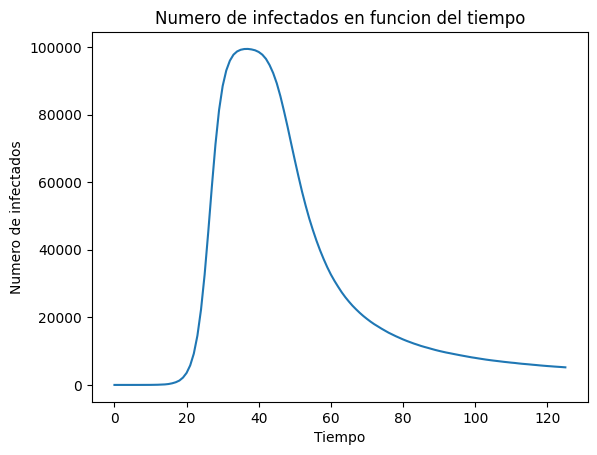

In [ ]:
simulation.start_simulation()